# Citation of YOLOv8 as specified on the model's host site

@software{yolov8_ultralytics,
  author = {Glenn Jocher and Ayush Chaurasia and Jing Qiu},
  title = {Ultralytics YOLOv8},
  version = {8.0.0},
  year = {2023},
  url = {https://github.com/ultralytics/ultralytics},
  orcid = {0000-0001-5950-6979, 0000-0002-7603-6750, 0000-0003-3783-7069},
  license = {AGPL-3.0}
}

In [42]:
import numpy as np
from os import path # use this library to avoid Operating System specific file path shenanigans
using_colab = False

IF USING COLAB: run this cell to clone the repository

In [43]:
using_colab = True
!git clone https://githubtocolab.com/sjporter2/QR-Code-Detection-using-YOLO
!cd QR-Code-Detection-using-YOLO
!pip install -r QR-Code-Detection-using-YOLO/requirements.txt

fatal: destination path 'QR-Code-Detection-using-YOLO' already exists and is not an empty directory.


# Download Datasets

Run this cell to open data if using Colab

In [44]:
#Download Kaggle dataset (currently train dataset)
import kagglehub

# Download latest version
train = kagglehub.dataset_download("vincentv/qr-detection-yolo")

print("Path to dataset files:", train)


#Open Roboflow dataset (currently test dataset)
from google.colab import drive
drive.mount('/content/drive')

#Example of an image file being opened
open('/content/drive/MyDrive/qr code detection.v2i.yolov8/test/images/0050027974_jpg.rf.269ad5f89a28942eb9ccf09507a77b22.jpg')

Path to dataset files: /root/.cache/kagglehub/datasets/vincentv/qr-detection-yolo/versions/1
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<_io.TextIOWrapper name='/content/drive/MyDrive/qr code detection.v2i.yolov8/test/images/0050027974_jpg.rf.269ad5f89a28942eb9ccf09507a77b22.jpg' mode='r' encoding='UTF-8'>

# Download base YOLOv8 model

In [45]:
from ultralytics import YOLO

In [46]:
# Load a COCO-pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Display model information (optional)
model.info()

YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)

In [47]:
from IPython.display import Image # to display images in the notebook


image 1/1 /root/.cache/kagglehub/datasets/vincentv/qr-detection-yolo/versions/1/QR-detection-yolo/background_images/alesia-kazantceva-VWcPlbHglYc-unsplash.jpg: 448x640 2 chairs, 1 potted plant, 1 laptop, 127.1ms
Speed: 3.4ms preprocess, 127.1ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


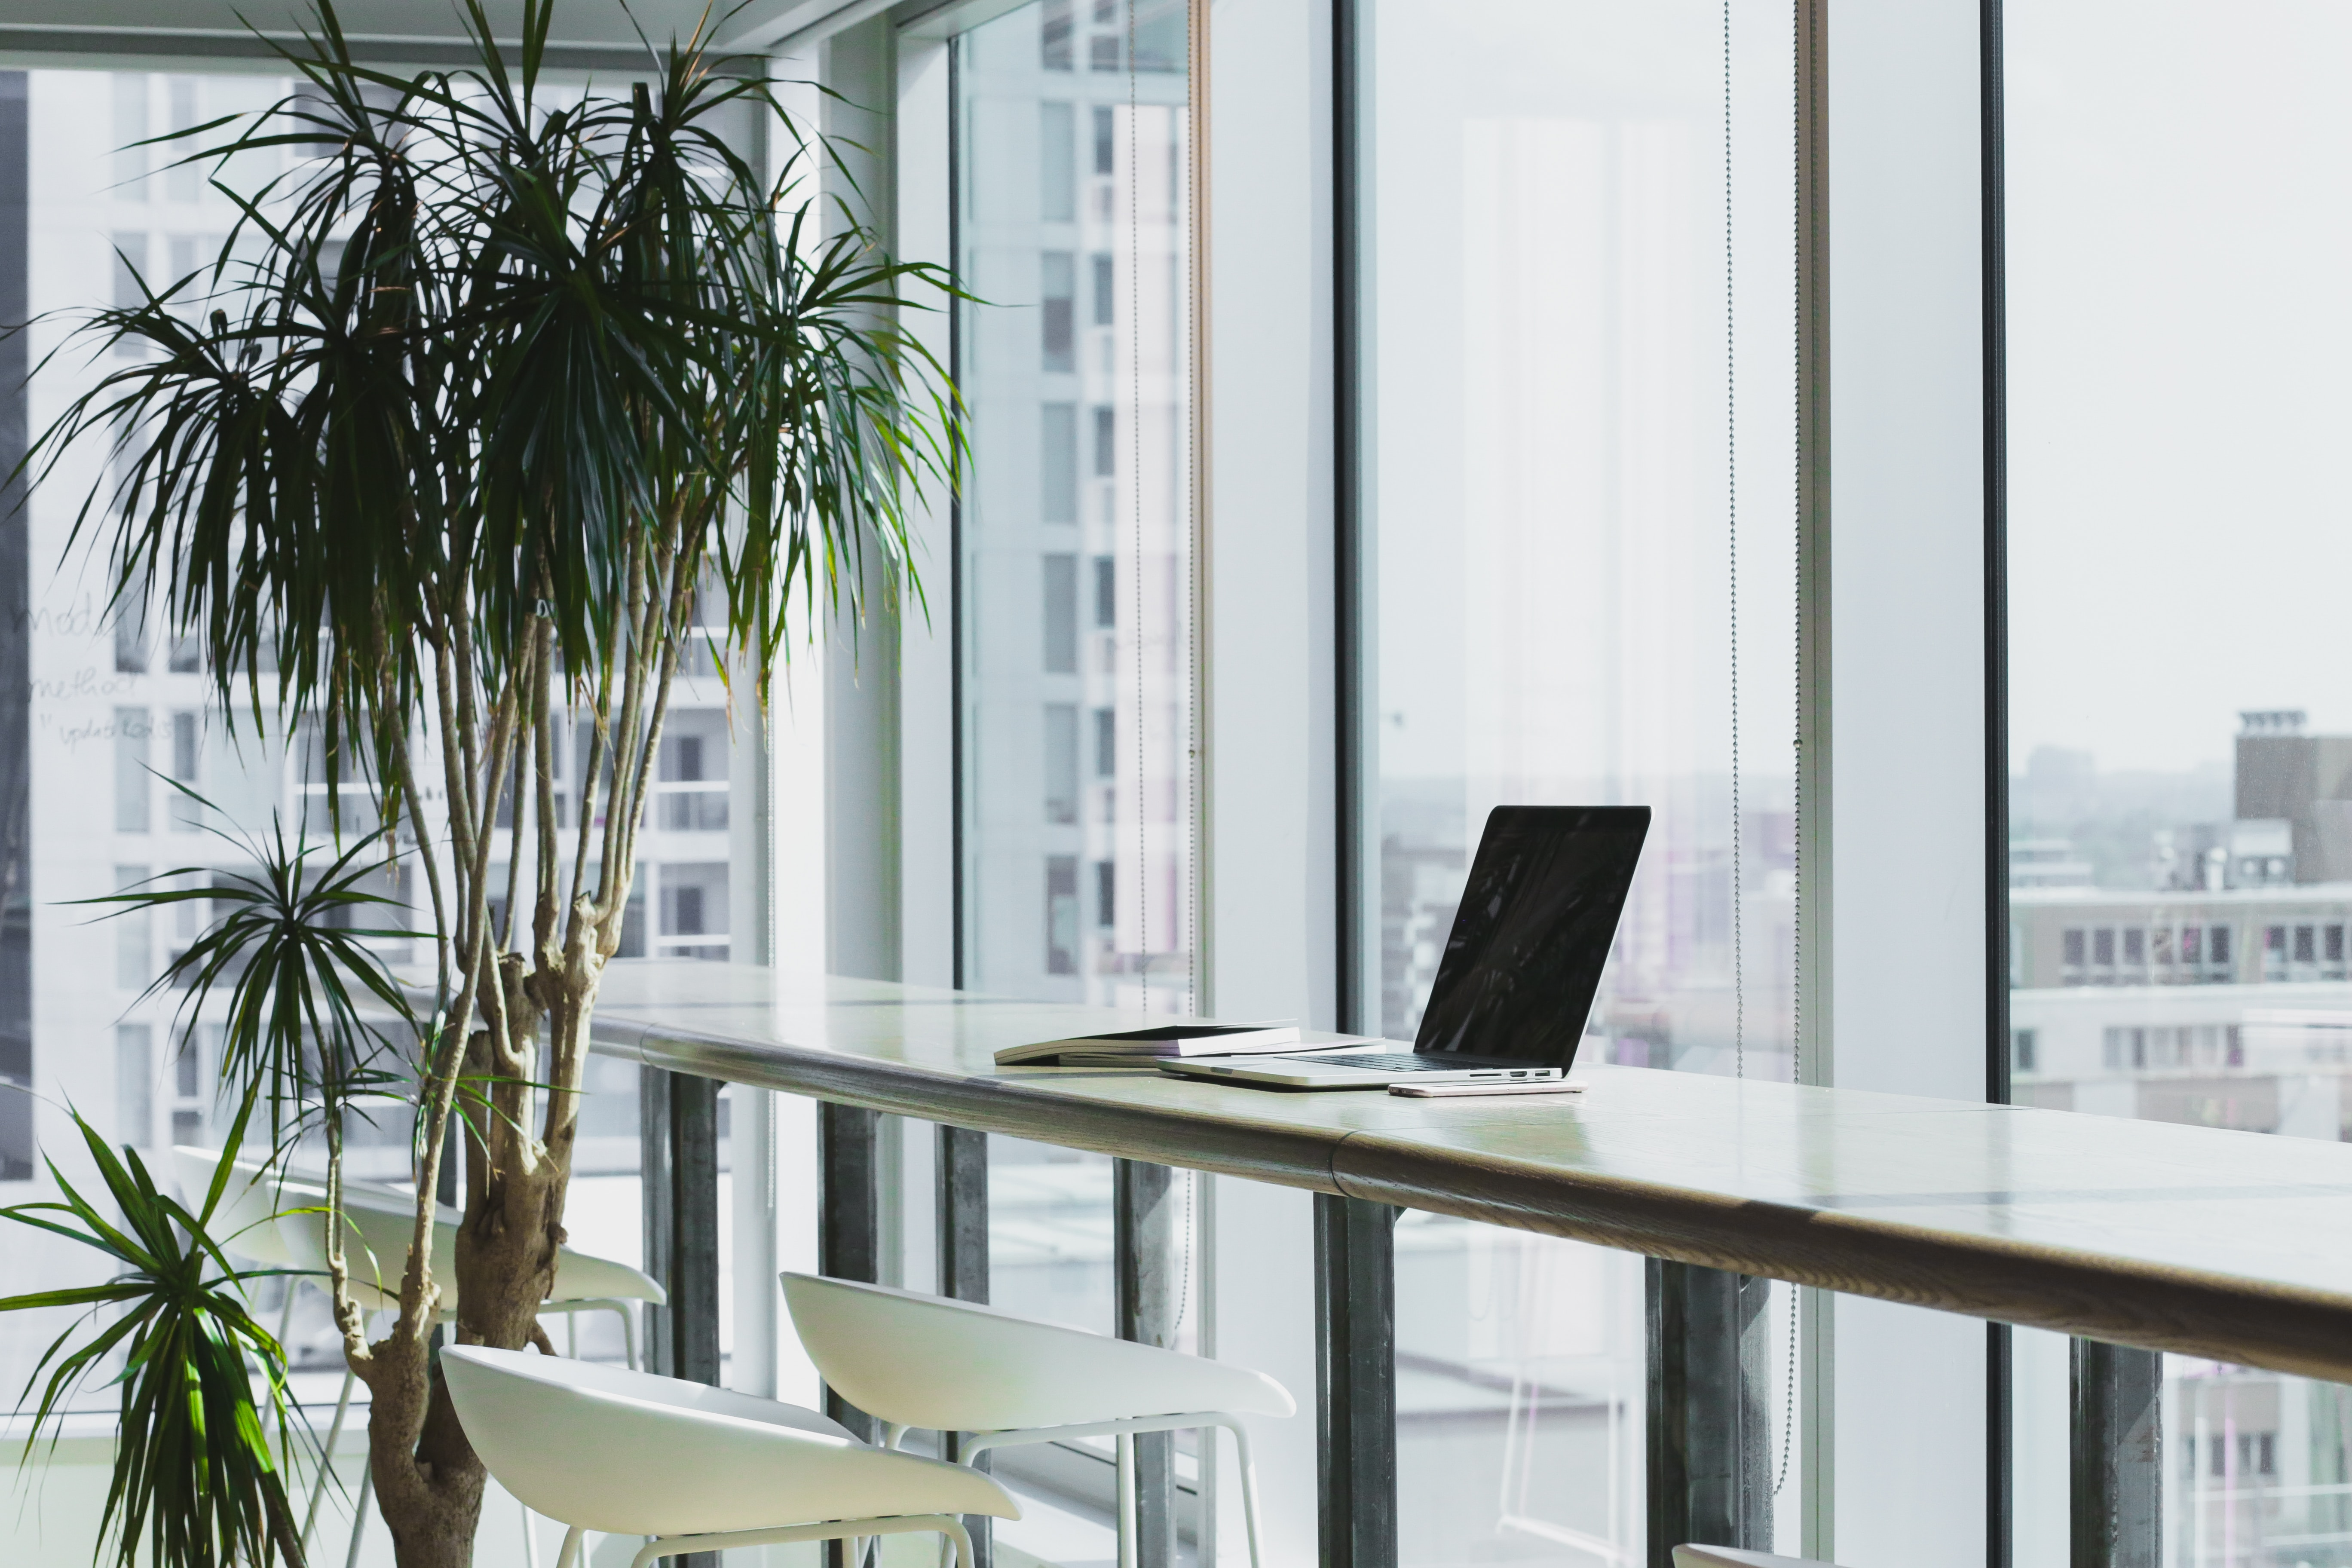

['laptop', 'chair', 'potted plant', 'chair']

In [50]:
if using_colab==True:
  path_root = train
  path_data = 'QR-detection-yolo/background_images/'
else:
  path_root = '.'
  path_data = 'data/QR-detection-yolo/background_images/'
filename = 'alesia-kazantceva-VWcPlbHglYc-unsplash.jpg'
path_file = path.join(path_root, path_data, filename)
results = model(path_file)

# results[0].names
classes = results[0].names
classes_pred = np.array(results[0].boxes.cls.cpu())

# display image on which model has been run and classes detected in image
display(Image(filename=path_file))
display([classes[e] for e in classes_pred])